In [1]:
!pytest -q


ERROR: c:\Users\HP\Downloads\insurance-risk-project\pytest.ini:5: duplicate section 'pytest'



c:\Users\HP\Downloads\insurance-risk-project\src\dataloader.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(self.path, sep=sep, parse_dates=['TransactionMonth', 'VehicleIntroDate'], low_memory=False)


[INFO] Loaded 1000098 rows and 52 columns


c:\Users\HP\Downloads\insurance-risk-project\src\dataclean.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].median(), inplace=True)
c:\Users\HP\Downloads\insurance-risk-project\src\dataclean.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

=== Data Shape ===
(1000098, 54)

=== Missing Data (Top 10) ===
                         missing_count  missing_percent
NumberOfVehiclesInFleet        1000098        100.00000
LossRatio                       381634         38.15966
TransactionMonth                     0          0.00000
IsVATRegistered                      0          0.00000
UnderwrittenCoverID                  0          0.00000
PolicyID                             0          0.00000
Title                                0          0.00000
Language                             0          0.00000
Bank                                 0          0.00000
AccountType                          0          0.00000

=== Numeric Summary (Top 10) ===
                         count          mean           std        min  \
UnderwrittenCoverID  1000098.0  1.048175e+05  6.329371e+04        1.0   
PolicyID             1000098.0  7.956682e+03  5.290039e+03       14.0   
PostalCode           1000098.0  3.020601e+03  2.649854e+03        1

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[INFO] Variability Stats:
                                  mean           std           var  \
UnderwrittenCoverID       1.048175e+05  6.329371e+04  4.006094e+09   
PolicyID                  7.956682e+03  5.290039e+03  2.798451e+07   
PostalCode                3.020601e+03  2.649854e+03  7.021728e+06   
mmcode                    5.488056e+07  1.360059e+07  1.849762e+14   
RegistrationYear          2.010225e+03  3.261391e+00  1.063667e+01   
Cylinders                 4.046616e+00  2.939410e-01  8.640131e-02   
cubiccapacity             2.466869e+03  4.427106e+02  1.959927e+05   
kilowatts                 9.721553e+01  1.939061e+01  3.759957e+02   
NumberOfDoors             4.019239e+00  4.681854e-01  2.191976e-01   
CustomValueEstimate       2.212193e+05  2.650521e+05  7.025261e+10   
NumberOfVehiclesInFleet            NaN           NaN           NaN   
SumInsured                6.041727e+05  1.508332e+06  2.275065e+12   
CalculatedPremiumPerTerm  1.178757e+02  3.997017e+02  1.597615e+

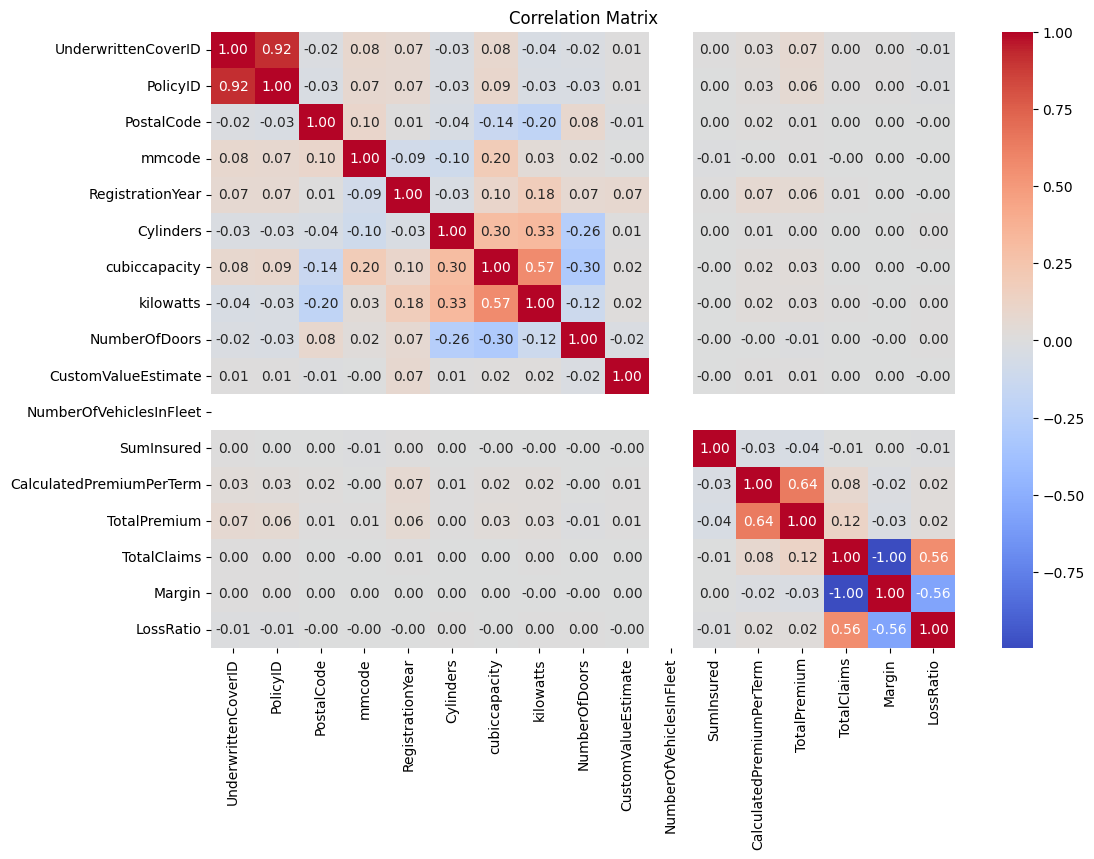

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


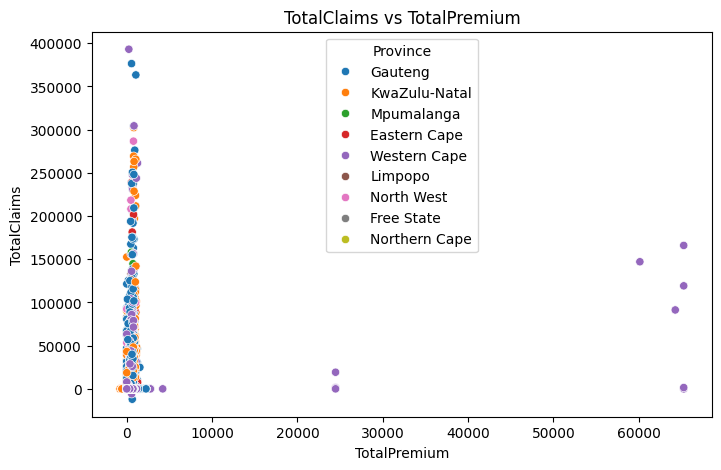

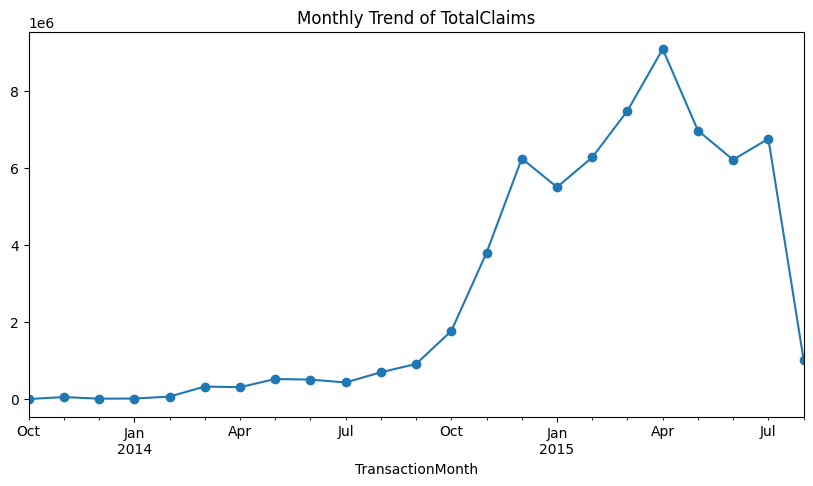

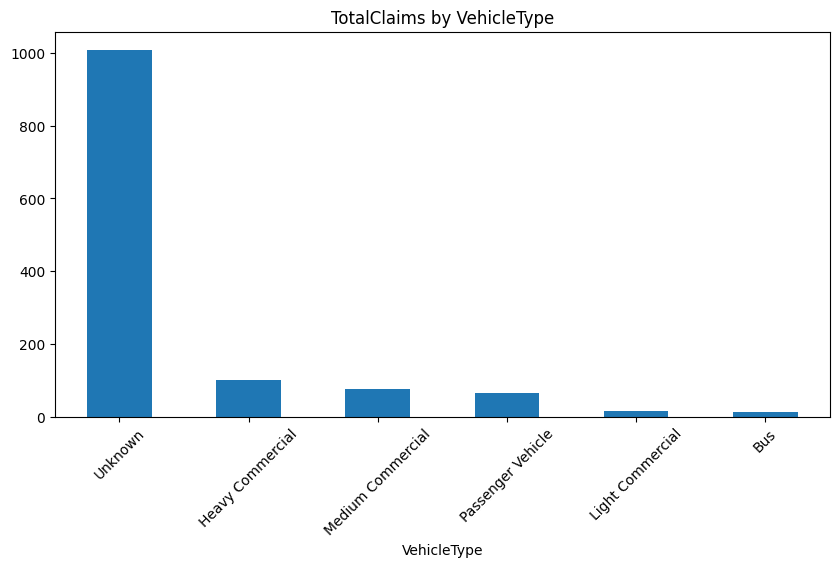

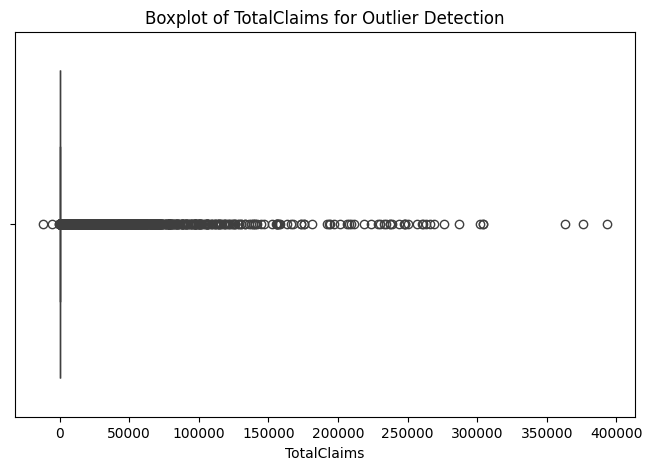

[INFO] TotalClaims outlier threshold: lower=0.0, upper=0.0


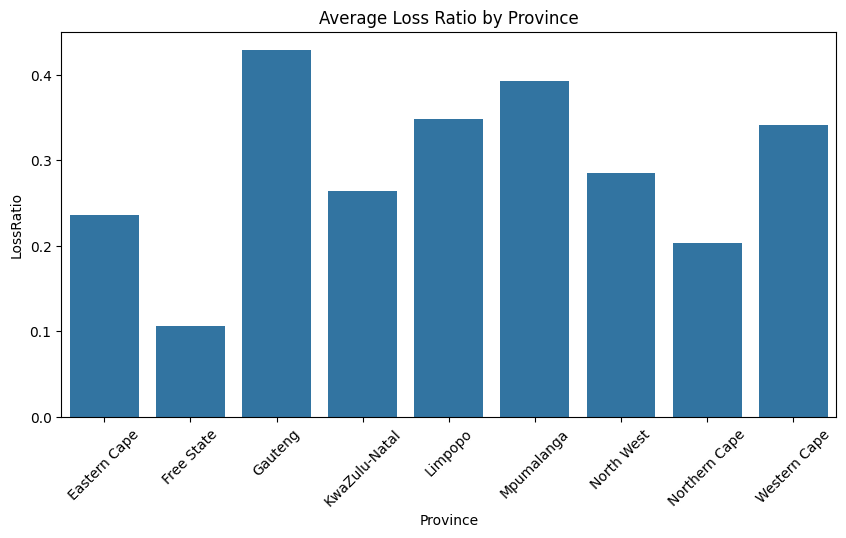

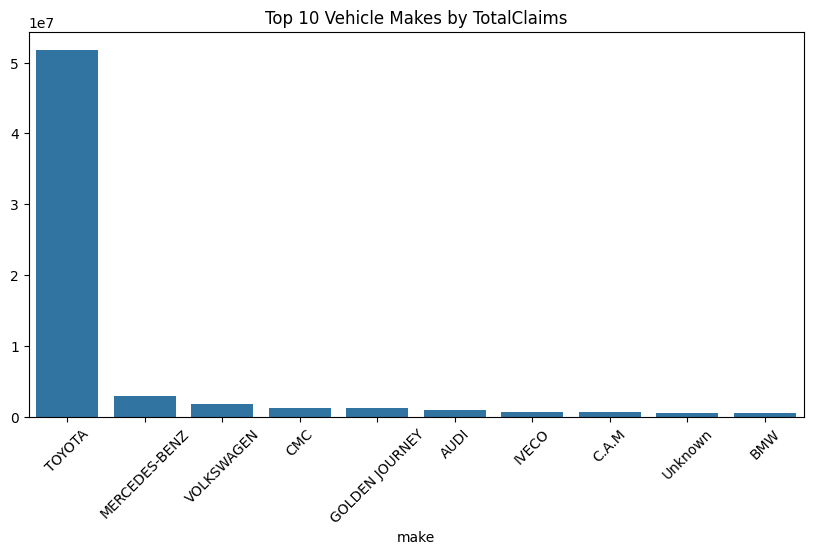

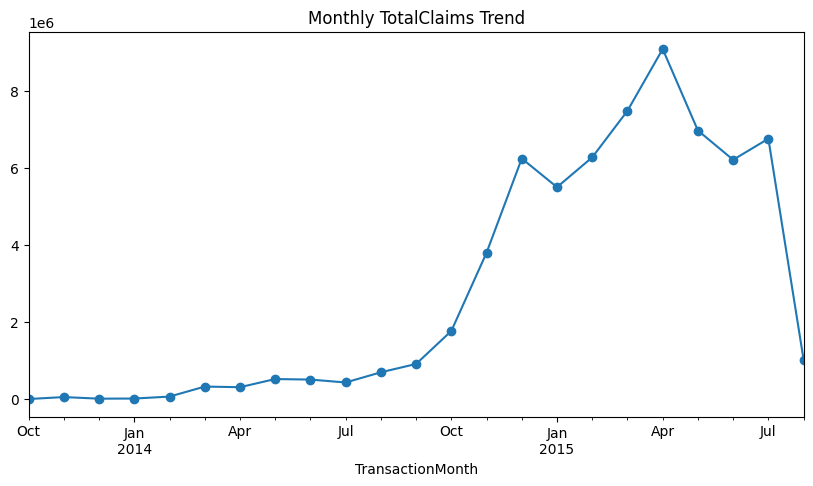

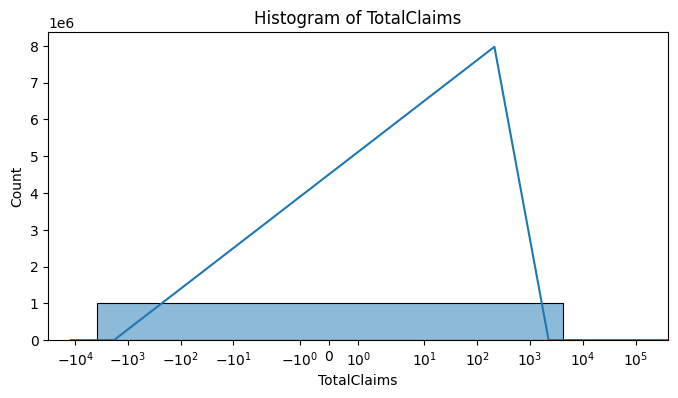

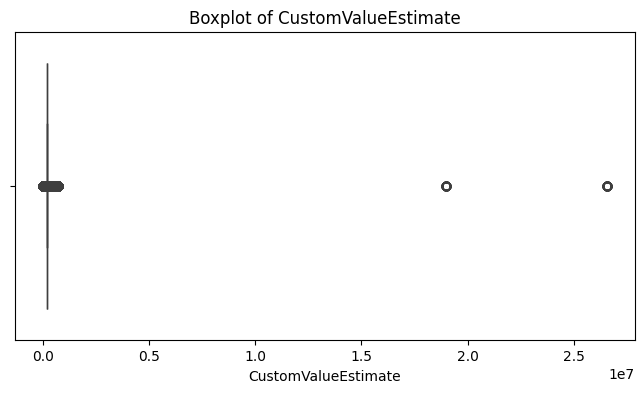

c:\Users\HP\Downloads\insurance-risk-project\src\visualizer.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


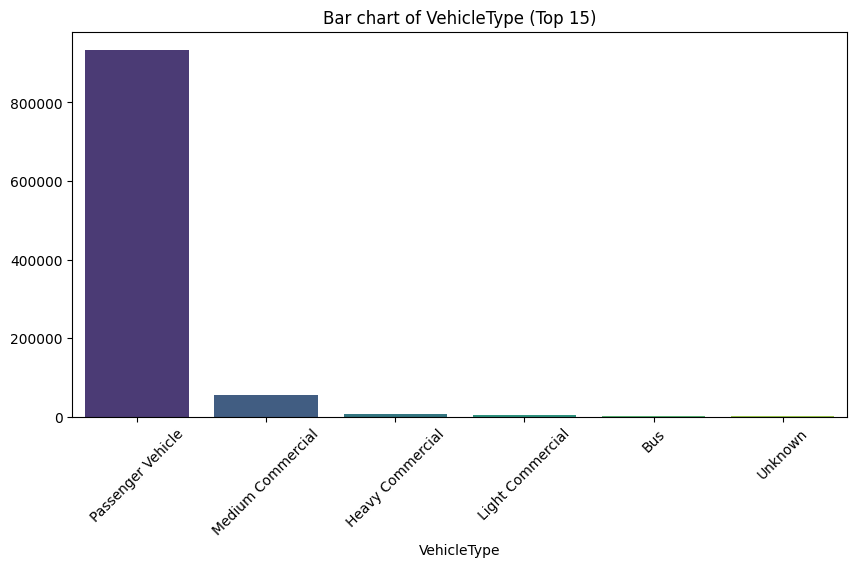

[INFO] Flagged 2788 extreme TotalClaims (>0.0)


In [ ]:

import import_ipynb
from src.dataloader import DataLoader
from src.dataclean import DataCleaner
from src.visualizer import Visualizer
from src.utils import flag_outliers
from src import dataunderstanding
from src.eda import EDAAnalyzer

def main():
    # Load
    loader = DataLoader("data/MachineLearningRating_v3.txt")
    df = loader.load_csv()
    
    # Clean
    cleaner = DataCleaner(df)
    df = cleaner.fix_dtypes()
    df = cleaner.handle_missing()
    df = cleaner.add_metrics()
    # Data Understanding
    du = dataunderstanding.DataUnderstanding(df)
    du.overview()

    

    # EDA
    eda = EDAAnalyzer(df)
    eda.overview()
    var_stats = eda.variability_stats()
    print("[INFO] Variability Stats:")
    print(var_stats[['mean','std','var','IQR','min','max']])
    eda.correlation_matrix()
    eda.scatter_plot('TotalPremium','TotalClaims', hue_col='Province')
    eda.monthly_trends('TotalClaims')
    eda.group_trends('VehicleType','TotalClaims')
    df, lower, upper = eda.boxplot_outliers('TotalClaims')
    print(f"[INFO] TotalClaims outlier threshold: lower={lower}, upper={upper}")
    eda.creative_plots()
    
    # Visuals
    viz = Visualizer(df)
    viz.histogram("TotalClaims", log_scale=True)
    viz.boxplot("CustomValueEstimate")
    viz.bar_chart("VehicleType")

    # Outlier detection
    df, threshold = flag_outliers(df, "TotalClaims")
    print(f"[INFO] Flagged {df['TotalClaims_is_outlier'].sum()} extreme TotalClaims (>{threshold})")
    
if __name__ == "__main__":
    main()
